## Imports


In [1]:
import sys

# Specify the directory where your data is located
project_dir = "D:/2M/D.Mining/Data-Mining-Project/"

# Change the working directory
sys.path.append(project_dir)

from src.utils import central_tendances, calculate_quartiles, histogram_plot, bar_plot
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
import warnings
warnings.filterwarnings("ignore")

# Specify the directory where your data is located
data_directory = 'D:/2M/D.Mining/Data-Mining-Project/'

# Change the working directory
os.chdir(data_directory)

sys.path.append('D:\\2M\D.Mining\Data-Mining-Project\\')

## Load Data


In [2]:
df = pd.read_csv("data/raw/temp_dataset.csv", index_col=0)

## Data Exploration


The first 5 rows of the data


In [3]:
df.head()

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6


convert the start date and end date objects to date object, by exploring the whole df we noticed two types of dates. The first one is like '10/31/2020' and the second one is like '12-Jan'. We need to convert both of them to date object.

The issue with the second format is that it doesn't have the year, so we need to add it. We will convert the start date of the first format and pick the most frequent year and use it to fill the year of the second format.


In [4]:
df_time_fixed = df.copy()
# Filter rows with and without a '/' in the 'Start date' column
filtered_df_with_year = df_time_fixed[df_time_fixed["Start date"].str.contains(
    "/")]
filtered_df_without_year = df_time_fixed[~df_time_fixed["Start date"].str.contains("/")][
    ["Start date", "end date", "time_period"]
]

# Convert the 'Start date' column to datetime format using .loc
filtered_df_with_year.loc[:, "year"] = pd.to_datetime(
    filtered_df_with_year["Start date"]
).dt.year

# Select the relevant columns
start_date_column_with_year = filtered_df_with_year[[
    "year", "Start date", "end date", "time_period"]]

for index, row in filtered_df_without_year.iterrows():
    if row["time_period"] not in start_date_column_with_year["time_period"].values:
        df_time_fixed.drop(index, inplace=True)
        continue
    time_period = row["time_period"]
    year = start_date_column_with_year.loc[
        start_date_column_with_year["time_period"] == time_period, "year"
    ].iloc[0]

    df_time_fixed["Start date"].loc[index] = pd.to_datetime(
        df["Start date"].loc[index] + '-' + str(int(year)))
    df_time_fixed["end date"].loc[index] = pd.to_datetime(
        df_time_fixed["end date"].loc[index] + '-' + str(int(year)))

for index, row in filtered_df_with_year.iterrows():
    df_time_fixed['Start date'].loc[index] = pd.to_datetime(
        df_time_fixed['Start date'].loc[index])
    df_time_fixed['end date'].loc[index] = pd.to_datetime(
        df_time_fixed['end date'].loc[index])
df_time_fixed

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11 00:00:00,2020-10-31 00:00:00,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,2021-05-30 00:00:00,2021-06-19 00:00:00,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,2021-03-28 00:00:00,2021-04-17 00:00:00,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2022-02-06 00:00:00,2022-02-26 00:00:00,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,2021-06-20 00:00:00,2021-07-10 00:00:00,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,2022-05-01 00:00:00,2022-05-21 00:00:00,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,2022-07-24 00:00:00,2022-08-13 00:00:00,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,2022-06-12 00:00:00,2022-07-02 00:00:00,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,2020-06-28 00:00:00,2020-07-18 00:00:00,53.0,1379.0,61.0,10.9,282.8,4.4


In [7]:
df_time_fixed["Start date"] = pd.to_datetime(df_time_fixed["Start date"])
df_time_fixed["end date"] = pd.to_datetime(df_time_fixed["end date"])

# keep only the dates
df_time_fixed["Start date"] = df_time_fixed["Start date"].dt.date
df_time_fixed["end date"] = df_time_fixed["end date"].dt.date
df_time_fixed

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,2021-05-30,2021-06-19,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2022-02-06,2022-02-26,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,2022-05-01,2022-05-21,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,2022-07-24,2022-08-13,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,2022-06-12,2022-07-02,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,2020-06-28,2020-07-18,53.0,1379.0,61.0,10.9,282.8,4.4


As we can see here the year with the highest frequency is 2021, therefore we will use it to fill the year of the second format.


To improve data readability, we will reorder columns and the rows according to Start date and the state zip code


In [ ]:
column_order = ['zcta', 'Start date', 'end date', 'time_period', 'population',
                'test count', 'positive tests', 'case count', 'test rate', 'case rate', 'positivity rate']



df = df[column_order].sort_values(by=['zcta', 'Start date'])

In [ ]:
df["zcta"].unique(), df["zcta"].nunique()

(array([94085, 94086, 94087, 95035, 95127, 95128, 95129], dtype=int64), 7)

The zcta (ZIP Code Tabulation Area) column represents the geographic region identifier. As we can notice here we have 7 regions


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 303 to 35
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zcta             337 non-null    int64  
 1   Start date       337 non-null    object 
 2   end date         337 non-null    object 
 3   time_period      337 non-null    int64  
 4   population       337 non-null    int64  
 5   test count       325 non-null    float64
 6   positive tests   310 non-null    float64
 7   case count       311 non-null    float64
 8   test rate        337 non-null    float64
 9   case rate        337 non-null    float64
 10  positivity rate  337 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 31.6+ KB


Number of rows and columns


In [ ]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 337
Number of columns: 11


Global infos about the data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 303 to 35
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zcta             337 non-null    int64  
 1   Start date       337 non-null    object 
 2   end date         337 non-null    object 
 3   time_period      337 non-null    int64  
 4   population       337 non-null    int64  
 5   test count       325 non-null    float64
 6   positive tests   310 non-null    float64
 7   case count       311 non-null    float64
 8   test rate        337 non-null    float64
 9   case rate        337 non-null    float64
 10  positivity rate  337 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 31.6+ KB


In [ ]:
for col in df.columns:
    print(f"Column name: {col}")
    print(f"Column type: {df[col].dtype}")
    unique_values = df[col].unique()
    num_unique = df[col].nunique()
    num_missing = df[col].isnull().sum()

    print(f"Number of unique values: {num_unique}")
    print(f"Number of missing values: {num_missing}")
    print("-" * 40)

Column name: zcta
Column type: int64
Number of unique values: 7
Number of missing values: 0
----------------------------------------
Column name: Start date
Column type: object
Number of unique values: 81
Number of missing values: 0
----------------------------------------
Column name: end date
Column type: object
Number of unique values: 81
Number of missing values: 0
----------------------------------------
Column name: time_period
Column type: int64
Number of unique values: 51
Number of missing values: 0
----------------------------------------
Column name: population
Column type: int64
Number of unique values: 7
Number of missing values: 0
----------------------------------------
Column name: test count
Column type: float64
Number of unique values: 320
Number of missing values: 12
----------------------------------------
Column name: positive tests
Column type: float64
Number of unique values: 209
Number of missing values: 27
----------------------------------------
Column name: ca

### Central tendencies


In [ ]:
for col in df.columns:
    if df[col].dtype != "object":
        central_tendencies = central_tendances(df[col])
        mean = f"{central_tendencies[0]:.2f}"
        median = f"{central_tendencies[1]}"
        mode = f"{central_tendencies[2]}"

        print(f"Column name: {col}")
        print(f"Mean: {mean} || Median: {median} || Mode: {mode}")

Column name: zcta
Mean: 94663.60 || Median: 95035.0 || Mode: [94085, 94086]
Column name: time_period
Mean: 43.69 || Median: 43.5 || Mode: [36, 54, 37, 38, 21, 56, 39, 22, 57, 40, 23, 58, 41, 24, 59, 42, 25, 60, 43, 26, 61, 44, 27, 62, 45, 28, 63, 46, 29, 64, 47, 30, 65, 48, 31, 66, 49, 32, 67, 50, 33, 51, 34, 52, 35, 53]
Column name: population
Mean: 50260.55 || Median: 50477.0 || Mode: [23223, 50477]
Column name: test count
Mean: nan || Median: 4478.5 || Mode: [2251.0, 1295.0, 2747.0, 6659.0, 2497.0]
Column name: positive tests
Mean: nan || Median: 127.5 || Mode: [47.0, 20.0, 63.0]
Column name: case count
Mean: nan || Median: 104.0 || Mode: [0.0]
Column name: test rate
Mean: 454.84 || Median: 427.15 || Mode: [0.1]
Column name: case rate
Mean: 19.39 || Median: 8.3 || Mode: [0.0]
Column name: positivity rate
Mean: 5.83 || Median: 3.05 || Mode: [1.1]


### Quartiles


In [ ]:
for col in df.columns:
    quartiles = calculate_quartiles(df[col])
    print(f"Column name: {col}")
    print(f"Minimum: {quartiles[0]}")
    print(f"Q1: {quartiles[1]}")
    print(f"Q2: {quartiles[2]}")
    print(f"Q3: {quartiles[3]}")
    print(f"Maximum: {quartiles[4]}")
    print("-" * 40)

Column name: zcta
Minimum: 94085
Q1: 94086
Q2: 95035
Q3: 95128
Maximum: 95129
----------------------------------------
Column name: Start date
Minimum: 2019-12-22 00:00:00
Q1: 2021-02-06 00:00:00
Q2: 2021-06-20 00:00:00
Q3: 2021-11-14 00:00:00
Maximum: 2022-10-16 00:00:00
----------------------------------------
Column name: end date
Minimum: 2020-01-11 00:00:00
Q1: 2021-02-13 00:00:00
Q2: 2021-07-02 00:00:00
Q3: 2021-11-13 00:00:00
Maximum: 2022-11-05 00:00:00
----------------------------------------
Column name: time_period
Minimum: 18
Q1: 31
Q2: 44
Q3: 56
Maximum: 155
----------------------------------------
Column name: population
Minimum: 23223
Q1: 36975
Q2: 50477
Q3: 66256
Maximum: 79655
----------------------------------------
Column name: test count
Minimum: 11.0
Q1: 2438.0
Q2: 4483.0
Q3: 6957.0
Maximum: 20177.0
----------------------------------------
Column name: positive tests
Minimum: 11.0
Q1: 52.0
Q2: 129.0
Q3: 396.0
Maximum: 35000.0
---------------------------------------

## Visualization


In [ ]:
categorical_columns = list(df.select_dtypes(include=["object"]).columns)
categorical_columns.append("zcta")
continuous_columns = df.select_dtypes(exclude=["object"]).columns.to_list()
continuous_columns.remove("zcta")
categorical_columns, continuous_columns

(['Start date', 'end date', 'zcta'],
 ['time_period',
  'population',
  'test count',
  'positive tests',
  'case count',
  'test rate',
  'case rate',
  'positivity rate'])

### Histograms


In [ ]:
df[categorical_columns]

,Start date,end date,zcta
303,2021-01-03 00:00:00,2021-01-23 00:00:00,94085
313,2021-01-12 00:00:00,2021-02-01 00:00:00,94085
317,2021-01-16 00:00:00,2021-02-05 00:00:00,94085
292,2021-01-24 00:00:00,2021-02-13 00:00:00,94085
305,2021-02-06 00:00:00,2021-02-26 00:00:00,94085
...,...,...,...
47,2022-07-24 00:00:00,2022-08-13 00:00:00,95129
45,2022-08-14 00:00:00,2022-09-03 00:00:00,95129
17,2022-09-04 00:00:00,2022-09-24 00:00:00,95129
9,2022-09-25 00:00:00,2022-10-15 00:00:00,95129


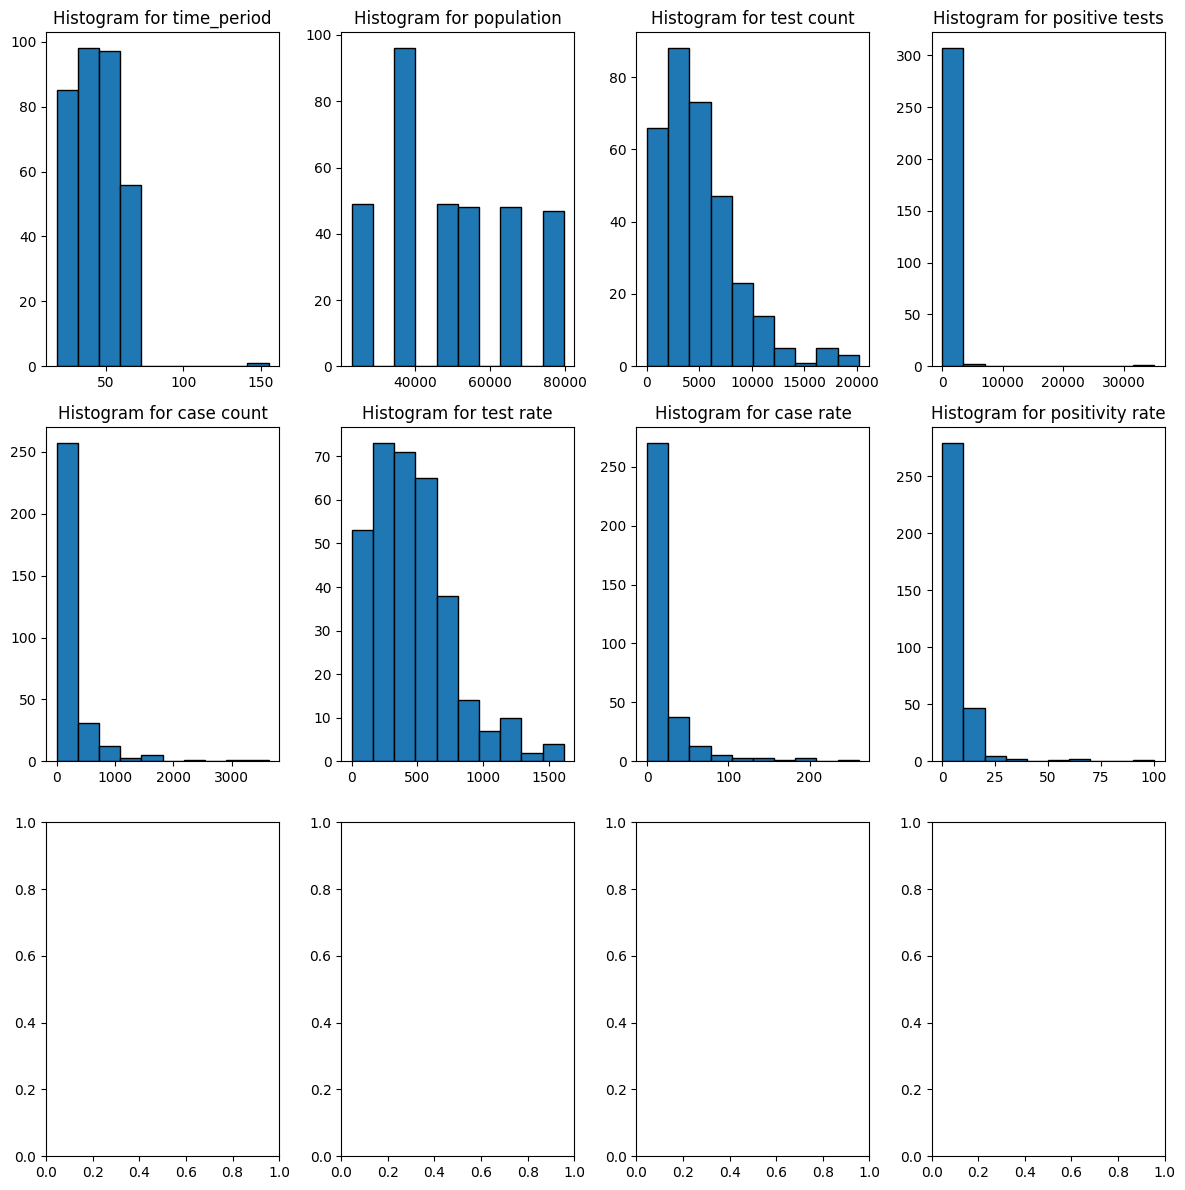

In [ ]:
histogram_plot(df[continuous_columns])

### Bar plots


<Axes: xlabel='zcta'>

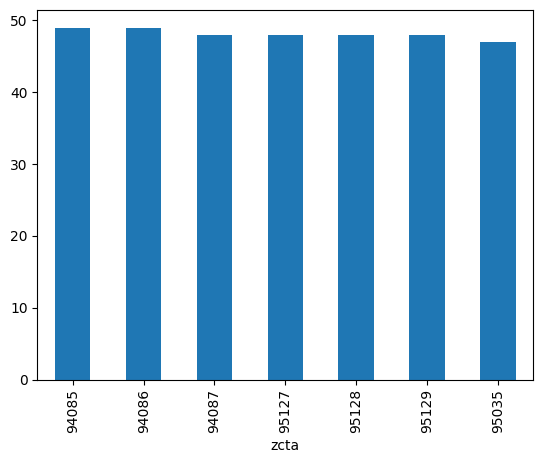

In [ ]:
df["zcta"].value_counts().plot(kind="bar")

AttributeError: Can only use .dt accessor with datetimelike values